In [26]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt 
import numpy as np
import scipy as sp
import scipy.ndimage.filters
from scipy import signal
from PIL import Image
from PIL import ImageFilter
from scipy import signal
import sklearn.cluster
from skimage import io, color

# from SimpleCV import Camera

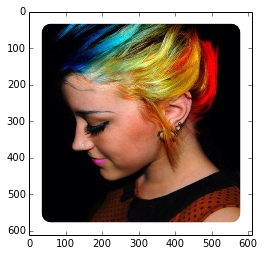

In [19]:
%matplotlib inline
im = Image.open('Images/Q2/colorful1.jpg')
plt.figure()
plt.imshow(np.asarray(im))

612 612 3
800 1280 3
343 494 3


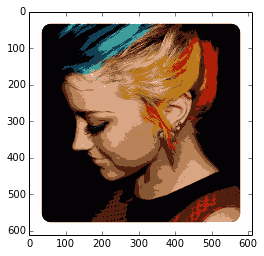

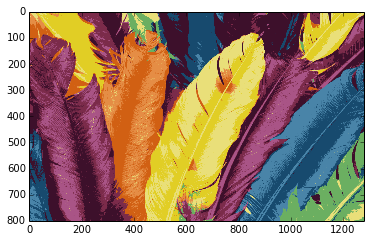

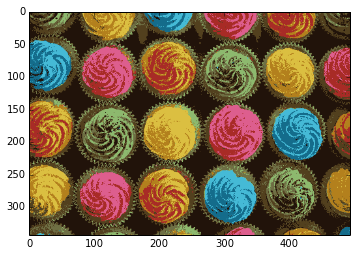

In [23]:
def quantized(img,k):
#     img = np.asarray(img)
    img = np.array(img, dtype=np.float64) / 255

    X = img.shape[0]
    Y = img.shape[1]
    Z = img.shape[2]
    print X, Y, Z
    #     creating kmeans object
    kmeans = sklearn.cluster.KMeans(k , max_iter = 2000, n_init = 20)
    #     smushing the 2d array of vectors to 1d array of vectors
#     sample=sklearn.utils.shuffle(img,(X*Y,Z))
    
    flat = np.reshape(img, (X*Y,Z))
    #     fiting the model
    kmeans.fit(flat)
    #     predicting with our model
    predictions = kmeans.predict(flat)
    #     generate color values from our prediction from k centoid values
    colors = kmeans.cluster_centers_
    #     creating new quantized image
    newimg = np.zeros((X,Y,Z))
    predict_i=0
#     predictions2d = np.reshape(predictions, (X, Y))
    for x in range(X):
        for y in range(Y):
            newimg[x][y] = colors[predictions[predict_i]]
            predict_i+=1
    return newimg
col_1 = Image.open('Images/Q2/colorful1.jpg')
col_2 = Image.open('Images/Q2/colorful2.jpg')
col_3 = Image.open('Images/Q2/colorful3.jpg')
img_1 = quantized(col_1,10)
img_2 = quantized(col_2,10)
img_3 = quantized(col_3,10)
%matplotlib inline
plt.figure()
plt.imshow(img_1)
plt.figure()
plt.imshow(img_2)
plt.figure()
plt.imshow(img_3)


(612, 612, 3)
(800, 1280, 3)
(343, 494, 3)


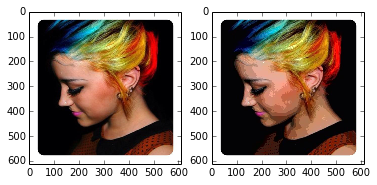

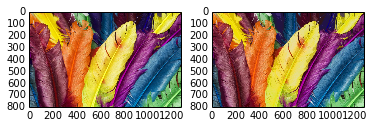

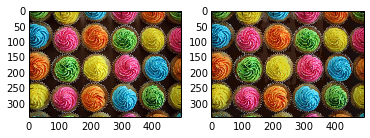

In [89]:
def RGBtoLAB(img):
    return color.rgb2lab(img)

def LinLABQuantize(img,k):
#     img = np.asarray(img)
    img = np.array(img, dtype=np.float64)
    print(img.shape)
    L = np.ndarray.flatten(img[:,:,0])
    
    L = L.reshape(-1, 1)
#     print L
    A = np.ndarray.flatten(img[:,:,1])
    B = np.ndarray.flatten(img[:,:,2])
    
    #     creating kmeans object
    kmeans = sklearn.cluster.KMeans(k , max_iter = 624, n_init = 16)
    #     smushing the 2d array of vectors to 1d array of vectors
    #     sample=sklearn.utils.shuffle(img,(X*Y,Z))
    kmeans.fit(L)
    #     predicting with our model
    predictions = kmeans.predict(L)
    #     generate color values from our prediction from k centoid values
    colors = kmeans.cluster_centers_
    #     creating new quantized image
    newL = np.zeros(len(L))
    #     predictions2d = np.reshape(predictions, (X, Y))
    for x in xrange(len(L)):
            newL[x] = colors[predictions[x]]
#     print newL.shape
#     print A.shape
#     print B.shape
    Z=np.concatenate([newL.reshape(-1, 1), A.reshape(-1, 1), B.reshape(-1, 1)],axis=1)
    return np.reshape(Z,tuple(img.shape))
    
    
def LABtoRGB(img):
    return color.lab2rgb(img)

def do_the_thing(img):
    lab = RGBtoLAB(img)
    newimg = LinLABQuantize(lab,8)
    newnewimg=LABtoRGB(newimg)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(np.asarray(img))
    plt.subplot(1,2,2)
    plt.imshow(newnewimg)

# col_4 = Image.open('Images/Q2/colorful4.jpg')
# img = RGBtoLAB(col_1)
# newimg = LinLABQuantize(img,8)
# newnewimg=LABtoRGB(newimg)
# print newimg.shape


%matplotlib inline
do_the_thing(col_1)
do_the_thing(col_2)
do_the_thing(col_3)
# plt.figure()
# plt.subplot(2,1,1)
# plt.imshow(np.asarray(col_1))
# plt.imshow(newnewimg)



# plt.figure()
# plt.imshow(col_1)

In [111]:
def SSD(img1, img2):
    im1 = np.array(img1, dtype=np.float64)
    im2 = np.array(img2, dtype=np.float64)
    assert im1.shape == im2.shape, "image sizes not equal!"
    i1 = im1.reshape(-1,3)
    i2 = im2.reshape(-1,3)
    
    sump = 0
    for j in range(len(i1)):
        one = i1[j]
        two = i2[j]
        sump += (one[0] - two[0])**2 + (one[1] - two[1])**2 +(one[2] - two[2])**2
    return sump

        
        
    
print SSD(col_1, img_1)

23285506376.8


In [ ]:
def L_hist_1(img):
    lab_repr=RGBtoLAB(img)
    L_channel=lab_repr[:,:,0]
    L_channel=np.ndarray.flatten(lab)
    n, bins, patches = plt.hist(L_channel, 100)
    plt.plot(bins, L_channel)
    
 L_hist_1()   